In [ ]:
import os
directory = "please_add_directory"
os.chdir(directory)

from Scripts import Utilities as ut
from Scripts import Feature_Extraction as fe
from Scripts import Model_Training as mt
from Scripts import data_loading as dl
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from IPython.display import clear_output
dataset = "urbansound8k"
classes = ["children_playing", "drilling", "street_music", "siren", "gun_shot", "car_horn", "air_conditioner", "engine_idling",  "dog_bark", "jackhammer"]

# Pipeline

There are two options to train a model here.

1. Download the dataset from the OFFICIAL source and export it inside the folder UrbanSound. Uncomment the part where the features are extracted ,which is the first cell after
   Fully Connected and CNN sections repectively, and run all.

2. Download the features from the google drive link we provide and add it at the UrbanSound Folder.

If you go with the second option please start running this notebook from Fully Connected section and after if you want to train a Fully-Connected Neural Network and a CNN classifier

Here we seperate the test data of our Project from the start of it so we will be sure we wont mees with it until the end.
Running the next cell 2 CSVs will be created countaing the Train and Test segments respectively.

In [2]:
# Seperate the test folder for it to not be messed in th training process
ut.split_8k_train_test("UrbanSound\\UrbanSound8K\\metadata\\UrbanSound8K.csv", "UrbanSound\\CSVs\\Train_csv", "UrbanSound\\CSVs\\Test_csv")

The next commands seperates the files from the original dataset to Train and Test Folders

In [ ]:
# Put files in Train and Test folders
ut.move_train_test_folder("UrbanSound\\CSVs\\Train_csv","UrbanSound\\Train","UrbanSound\\UrbanSound8K\\audio")

ut.move_train_test_folder("UrbanSound\\CSVs\\Test_csv","UrbanSound\\Test","UrbanSound\\UrbanSound8K\\audio")

Now we arrange every file into each folder where folder name = Category

In [ ]:
# In train folder put evry file in the corespondiong category
ut.move_to_class_folder("UrbanSound\\CSVs\\Train_csv","UrbanSound\\Train",dataset)

# Fully Connected

Before extracting features some files need to be deleted , we could not find a way to error handle this because it was part of the PyAudioanalysis library.

If you get that a file failed at the end of the procedure you need to add the prefix and the folder to the files below delete it and start extracting features from scratch.

After that, features are extracted using MidTermFeatures from PyAudioAnalysis library and are saved as numpy file at UrbanSound\Features\NN_features directory.

In [ ]:

""" Uncomment if you want to extract the features for the Fully Connected model """


children_playing_folder = 'UrbanSound/Train/children_playing'
drilling_folder = 'UrbanSound/Train/drilling'
jackhammer_folder = 'UrbanSound/Train/jackhammer'

children_playing_prefix = '36429'
drilling_prefix = '19007'
jackhammer_prefix = '88466'

ut.delete_files_with_prefix(children_playing_folder, children_playing_prefix)
ut.delete_files_with_prefix(drilling_folder, drilling_prefix)
ut.delete_files_with_prefix(jackhammer_folder, jackhammer_prefix)



#fe.NN_Features("UrbanSound\\Train", "UrbanSound\\Features\\NN_Features")


We are ready to load our data now and train our model. More inshights you can find at data loading and Model_Training scripts


In [14]:
x_train, x_val, y_train, y_val ,encode =  dl.load_data("UrbanSound\\Features\\NN_Features", dataset)

In [7]:

model = mt.create_model_NN()
learning_rate = 0.0001
model.compile(optimizer=Adam(learning_rate = learning_rate ), loss='categorical_crossentropy', metrics=[mt.f1_score, 'accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=15, verbose=1)
checkpoint = ModelCheckpoint( 'Models\\temp.h5',monitor='val_accuracy', verbose=1,   save_best_only=True, mode='max')

In [ ]:
hist = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=200, callbacks = [early_stopping,checkpoint],
    batch_size=32
    )


 ------------------------------------------- These are not the real results -------------------------------------

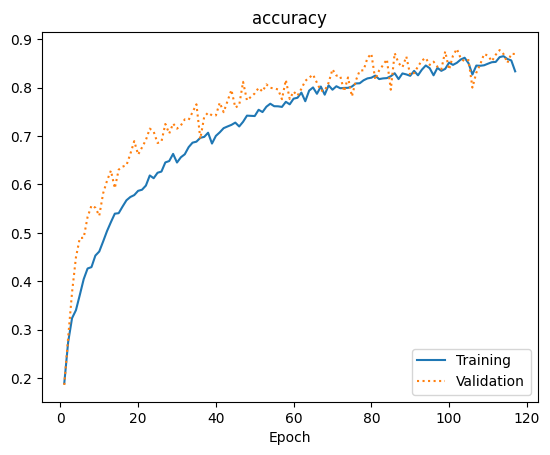

In [9]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
mt.plot_training_history(acc,val_acc,"accuracy")

66/66 [==============================] - 0s 4ms/step
Accuracy: 0.9056061332055583
F1 Score: 0.9057528838391065


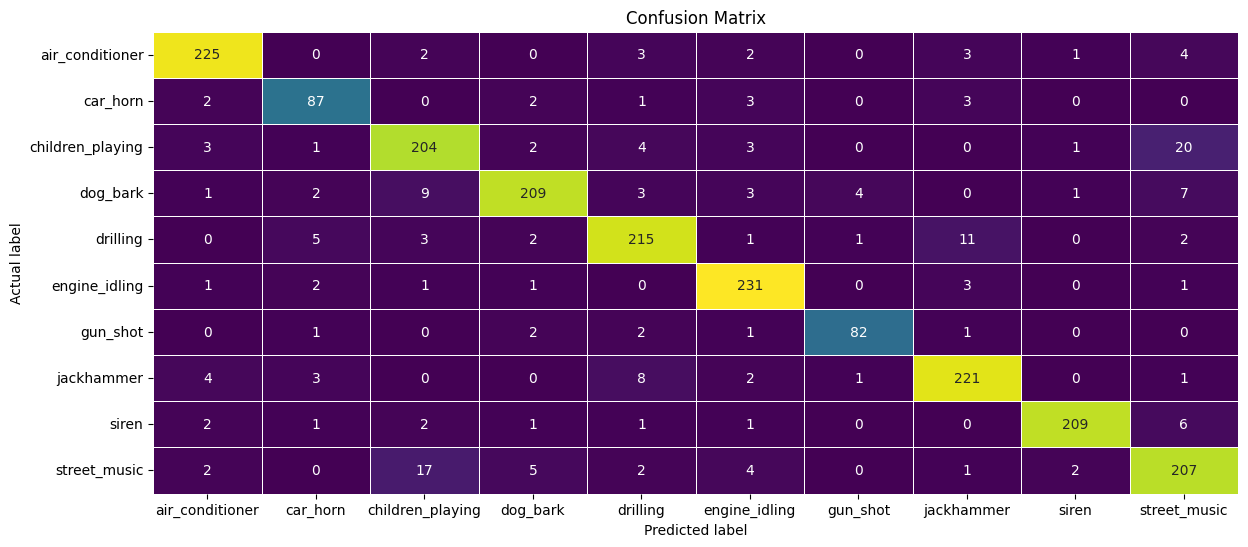

In [15]:
mt.plot_confusion_matrix(model,x_val,y_val,encode)

In [ ]:
model = mt.model_load("Models\\temp.h5")
clear_output()
model.save("Models\\Final_Models\\Fully_Connected.h5")

# CNN

We use DeppAudioFeatures library to extract melspectrogram with Librosa, of fixed size 128x81 and everything smaller to be zero paded.

Features will be save at UrbanSound\Features\CNN_Features directory as numpy files.

In [ ]:
""" Uncomment if you want to extract the features for the CNN model"""


#fe.CNN_Features_mel("UrbanSound\Train", classes, "UrbanSound\Features\CNN_Features")

Load Data and Train a simple CNN classifier.

In [10]:
x_train, x_val, y_train, y_val, le =  dl.load_data("UrbanSound\Features\CNN_Features", dataset)

In [11]:
model = mt.create_model_CNN(num_classes=10)
learning_rate = 0.0001
model.compile(optimizer=Adam(learning_rate = learning_rate ), loss='categorical_crossentropy', metrics=[mt.f1_score, 'accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=15, verbose=1)
checkpoint = ModelCheckpoint( 'Models\\temp.h5',monitor='val_accuracy', verbose=1,   save_best_only=True, mode='max' )


In [ ]:
hist = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=100, callbacks = [early_stopping,checkpoint],
    batch_size=32
    )

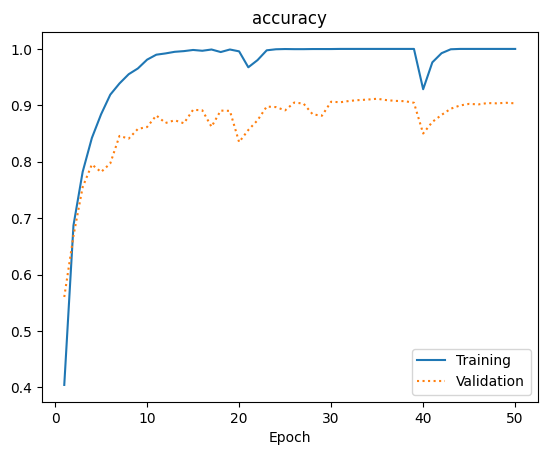

In [12]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
mt.plot_training_history(acc,val_acc,"accuracy")

66/66 [==============================] - 0s 5ms/step
Accuracy: 0.9116523400191022
F1 Score: 0.9113302707735604


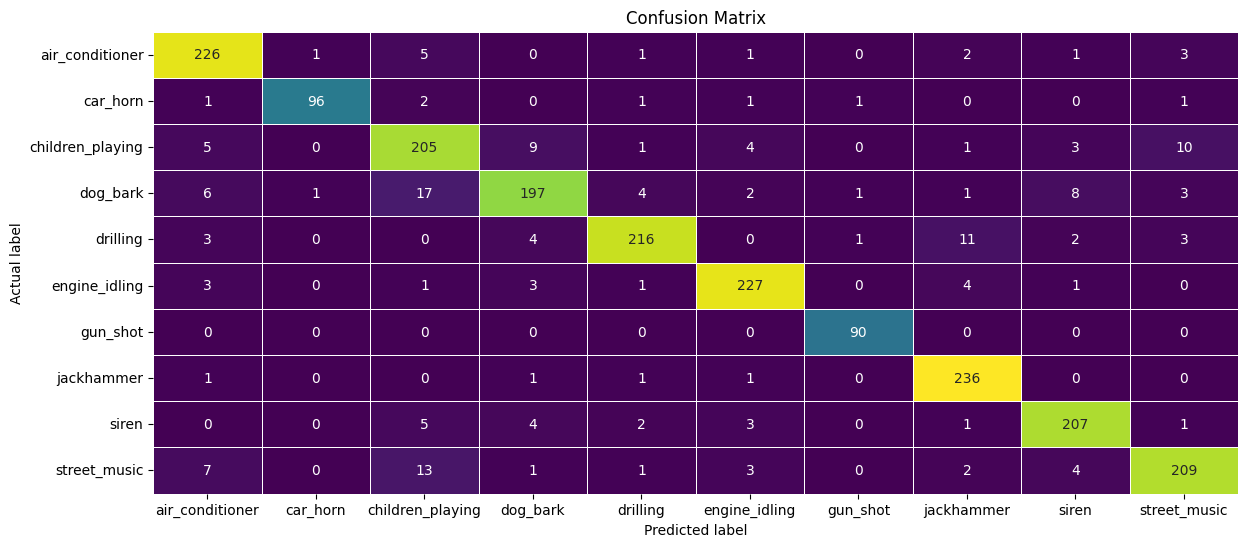

In [15]:
mt.plot_confusion_matrix(model,x_val,y_val,le)


In [16]:
model = mt.model_load("Models\\temp.h5")
clear_output()

model.save("Models\\Final_Models\\UrbanSound_CNN.h5")